### 컨텐츠 기반 필터링 – 플랜잇 Dataset

In [31]:
import pandas as pd
import numpy as np
import warnings; warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/gdrive')

plants=pd.read_excel('/gdrive/My Drive/Colab Notebooks/DataHandling/total_plants_property_final_final_0315.xlsx')
print(plants.shape)
plants.head(10)

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
(245, 8)


,id,plant_name,section,preference,sunlight,humidity,air_purification,pet_safe
0,1,몬스테라 델리시오사,plant,Leafy Vine Has_fruit Holed Broad split Heart_s...,반음지,습도 : 높은 습도,1.0,0.0
1,2,올리브 나무,plant,Leafy Has_flower Has_fruit Wooden Small,양지,습도 : 쾌적한 습도,0.0,0.0
2,3,몬스테라 알보 바리에가타,plant,Vine Has_fruit Heart_shaped Patterned,반양지,습도 : 높은 습도,1.0,0.0
3,4,몬스테라 아단소니,plant,Leafy Hanging Vine Holed Round Heart_shaped Flat,반양지,습도 : 높은 습도,0.0,0.0
4,5,스투키,plant,Cactus/Succulent Has_flower No_spike_cactus Ro...,반음지,습도 : 쾌적한 습도,0.0,0.0
5,6,은엽 아카시아,plant,Leafy Has_flower Small,양지,습도 : 쾌적한 습도,0.0,1.0
6,7,사계귤 (유주나무),plant,Leafy Has_flower Has_fruit Wooden Round Thick,양지,습도 : 쾌적한 습도,0.0,1.0
7,8,헤데라 (아이비),plant,Leafy Vine Has_flower Star_shaped Small Patterned,반음지,습도 : 쾌적한 습도,1.0,0.0
8,9,아레카야자,plant,Leafy Long,반양지,습도 : 다소 높은 습도,1.0,1.0
9,10,금전수 (돈나무),plant,Leafy Has_flower Round Thick,반음지,습도 : 쾌적한 습도,1.0,0.0


In [32]:
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer를 적용하기 위해 공백문자로 word 단위가 구분되는 문자열로 변환. 
count_vect = CountVectorizer(min_df=0, ngram_range=(1,2))
prefer_mat = count_vect.fit_transform(plants['preference'])
print(prefer_mat.shape)

(245, 181)


In [33]:
from sklearn.metrics.pairwise import cosine_similarity

prefer_sim = cosine_similarity(prefer_mat, prefer_mat)
print(prefer_sim.shape)
print(prefer_sim)


(245, 245)
[[1.         0.18490007 0.41931393 ... 0.1672484  0.20180184 0.15384615]
 [0.18490007 1.         0.12598816 ... 0.10050378 0.32338083 0.09245003]
 [0.41931393 0.12598816 1.         ... 0.11396058 0.09166985 0.10482848]
 ...
 [0.1672484  0.10050378 0.11396058 ... 1.         0.5118907  0.66899361]
 [0.20180184 0.32338083 0.09166985 ... 0.5118907  1.         0.80720735]
 [0.15384615 0.09245003 0.10482848 ... 0.66899361 0.80720735 1.        ]]


In [34]:
# heat_data = pd.DataFrame(prefer_sim)
# xlxs_dir = '/gdrive/My Drive/Colab Notebooks/DataHandling/heatmap.xlsx'

# with pd.ExcelWriter(xlxs_dir) as writer:
#      heat_data.to_excel(writer, sheet_name = 'heat')

In [35]:
prefer_sim_sorted_ind = prefer_sim.argsort()[:, ::-1]
print(prefer_sim_sorted_ind)

[[  0 160 207 ... 206 209 182]
 [  1  69  44 ... 216 217 220]
 [  2 160 207 ... 168  96 122]
 ...
 [242 244 233 ... 124 184 170]
 [243 244 235 ... 204 201 185]
 [244 243 242 ... 100 189 122]]


In [36]:
def find_sim_plant(df, sorted_ind, mbti_name):
    
    # 인자로 입력된 plants DataFrame에서 'plant_name' 컬럼이 입력된 mbti_name 값인 DataFrame추출
    mbti = df[df['plant_name'] == mbti_name]
    
    # mbti_name을 가진 DataFrame의 index 객체를 ndarray로 반환하고 
    # sorted_ind 인자로 입력된 prefer_sim_sorted_ind 객체에서 유사도 순으로 top_n 개의 index 추출
    mbti_index = mbti.index.values
    #similar_indexes = sorted_ind[mbti_index, :(top_n)]
    similar_indexes = sorted_ind[mbti_index]
    
    # 추출된 top_n index들 출력. top_n index는 2차원 데이터 임. 
    #dataframe에서 index로 사용하기 위해서 1차원 array로 변경
    # print(similar_indexes)
    similar_indexes = similar_indexes.reshape(-1)
    
    return df.iloc[similar_indexes]


In [51]:
similar_plants = find_sim_plant(plants, prefer_sim_sorted_ind, 'ESFJ')
similar_plants = similar_plants[similar_plants['section'] == 'plant']
similar_plants[:10]

,id,plant_name,section,preference,sunlight,humidity,air_purification,pet_safe
162,163,목마가렛,plant,Leafy Fragrant Has_flower Has_fruit Wooden Sha...,양지,습도 : 쾌적한 습도,0.0,0.0
108,109,제라늄,plant,Leafy Fragrant Has_flower Has_fruit Star_shape...,반양지,습도 : 쾌적한 습도,1.0,0.0
166,167,아프리칸 바이올렛,plant,Leafy Has_flower Has_fruit Round Thick,반양지,습도 : 쾌적한 습도,0.0,1.0
58,59,오렌지 자스민,plant,Leafy Fragrant Has_flower Has_fruit Wooden Rou...,반양지,습도 : 쾌적한 습도,0.0,0.0
227,228,머틀허브,plant,Leafy Fragrant Has_flower Has_fruit Wooden Sha...,반양지,습도 : 쾌적한 습도,0.0,0.0
28,29,율마 (윌마),plant,Leafy Fragrant Has_flower Sharp,양지,습도 : 다소 높은 습도,1.0,0.0
69,70,애니시다,plant,Leafy Fragrant Has_flower Has_fruit Wooden Small,반양지,습도 : 쾌적한 습도,0.0,0.0
57,58,동백나무,plant,Leafy Fragrant Has_flower Has_fruit Wooden Thick,반양지,습도 : 쾌적한 습도,0.0,1.0
76,77,히아신스,plant,Leafy Fragrant Has_flower Has_fruit Chubby Long,반양지,습도 : 쾌적한 습도,0.0,0.0
172,173,시클라멘,plant,Leafy Fragrant Has_flower Round Heart_shaped P...,반양지,습도 : 쾌적한 습도,0.0,1.0


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 8]

In [39]:
hm_mbti = pd.read_excel('/gdrive/My Drive/Colab Notebooks/DataHandling/heatmap_mbti_touch.xlsx')
df_mbti = hm_mbti.pivot('Comparison_MBTI', 'Type', 'Weight')
df_mbti.head()

Type,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
Comparison_MBTI,,,,,,,,,,,,,,,,
ENFJ,100.000000,61.538462,24.806947,73.960026,46.153846,64.450339,33.449680,33.449680,62.897090,71.611487,24.806947,48.038446,25.087260,50.174521,33.633640,46.153846
ENFP,61.538462,100.000000,49.613894,55.470020,53.846154,71.611487,16.724840,16.724840,52.414242,78.772636,24.806947,32.025631,33.449680,33.449680,20.180184,15.384615
ENTJ,24.806947,49.613894,100.000000,29.814240,37.210420,23.094011,26.967994,13.483997,33.806170,23.094011,60.000000,25.819889,40.451992,13.483997,21.693046,12.403473
ENTP,73.960026,55.470020,29.814240,100.000000,36.980013,51.639778,30.151134,10.050378,50.395263,68.853037,29.814240,19.245009,10.050378,30.151134,24.253563,27.735010
ESFJ,46.153846,53.846154,37.210420,36.980013,100.000000,78.772636,58.536941,25.087260,31.448545,57.289190,24.806947,32.025631,41.812101,58.536941,53.813824,38.461538


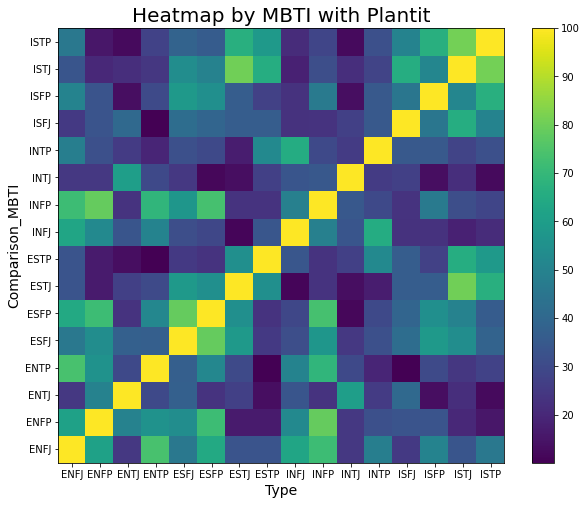

In [40]:
#heatmap by plt.pcolor()
plt.pcolor(df_mbti)
plt.xticks(np.arange(0.5, len(df_mbti.columns), 1), df_mbti.columns)
plt.yticks(np.arange(0.5, len(df_mbti.index), 1), df_mbti.index)
plt.title('Heatmap by MBTI with Plantit', fontsize=20)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Comparison_MBTI', fontsize=14)
plt.colorbar()
plt.show()


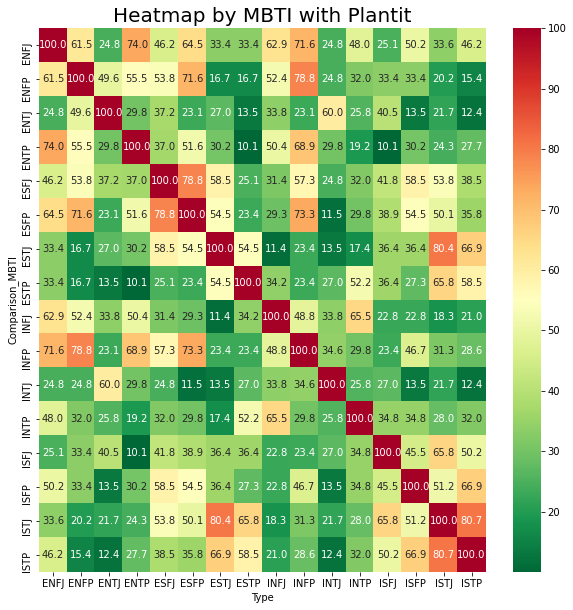

In [48]:
# different colormap
sns.heatmap(df_mbti, cmap='RdYlGn_r', annot=True, fmt='0.1f') 
plt.title('Heatmap by MBTI with Plantit', fontsize=20)
plt.show()

In [42]:
hm_plant = pd.read_excel('/gdrive/My Drive/Colab Notebooks/DataHandling/heatmap_plant_touch.xlsx')
df_plant = hm_plant.pivot('Comparison_Plant', 'Plant_name', 'Weight')
df_plant.head()

Plant_name,African Milk Tree,African violet,Aglaonema (silver evergreen),Air Plant,Alocasia,Alocasia 'Black Velvet',Alocasia Sarian,Aloe vera,Amazonian elephant's ear (African mask),Angel Wings (Senaw),Anthurium (tail flower),Anthurium forgetii,Anthurium regale,Arabian Jasmine,Ardisia japonica,Areca palm,Arizona Snowcap,Asparagus fern,Asplenium nidus,Autograph tree,Baby rubberplant,Banyan tree,Basil,Beefsteak Plant,Begonia,Bird nest snake plant,Bismarckia nobilis,Black Rose,Blue Columnar Cactus,Blue Fescue,Blue candle,Blue star fern,Boston fern,Brush Cherry,Bunny ears cactus,Caladium,Calathea Orbifolia (Prayer Plant),Calathea Setosa,Calypso Queen (Dwarf Bouquet),Camellia,...,Tillandsia juncea,Tillandsia schiedeana,Tillandsia seleriana,Tillandsia stricta,Tineke rubber tree,Tulip,Variegated Philodendron,Variegated Swiss cheese plant,Velvet Cardboard Anthurium,Velvet-leaf Philodendron,Vicks Plant,Watermelon Dischidia,Watermelon Peperomia,Wax plant (Honey plant),Weeping fig,White Ghost,White Jasmine,Whorled Pennywort,Wilma Goldcrest (Monterey cypress),Wire plant,Wire-netting bush,Xanthosoma lindenii,Yellow Jasmine,Yellow star jasmine,Yucca,bamboo palm,bird of paradise,black-gold philodendron,cider gum,common Myrtle,common staghorn fern,fiddle-leaf fig,lace tree philodendron,lemon balm,monstera,prayer plant,rosary vine,rosemary,sensitive plant,zebra haworthia
Comparison_Plant,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NaN,14.285714,37.796447,33.80617,22.792115,37.796447,28.571429,34.188173,42.857143,28.571429,19.518001,42.857143,28.571429,45.584231,20.965697,50.395263,43.643578,0.000000,42.857143,21.821789,14.285714,12.598816,25.197632,50.709255,16.903085,42.857143,0.000000,22.792115,19.518001,22.792115,84.515425,20.965697,33.806170,28.571429,19.518001,22.792115,28.571429,28.571429,33.80617,45.584231,22.792115,...,0.000000,0.000000,0.000000,0.000000,28.571429,57.142857,25.197632,14.285714,41.931393,22.792115,19.518001,0.000000,45.584231,23.643312,25.197632,0.00000,0.0,16.903085,28.571429,16.903085,34.188173,37.796447,10.482848,28.571429,24.743583,50.395263,50.395263,34.188173,22.792115,29.277002,22.792115,12.598816,10.482848,28.571429,10.482848,31.448545,24.743583,25.197632,71.428571,45.584231
African Milk Tree,100.000000,0.000000,0.00000,11.396058,0.000000,0.000000,11.396058,57.142857,0.000000,29.277002,0.000000,0.000000,0.000000,0.000000,12.598816,21.821789,50.709255,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.709255,11.396058,29.277002,45.584231,16.903085,41.931393,16.903085,14.285714,29.277002,45.584231,0.000000,0.000000,0.00000,11.396058,0.000000,...,0.000000,0.000000,0.000000,0.000000,14.285714,14.285714,0.000000,0.000000,0.000000,0.000000,29.277002,0.000000,0.000000,31.524416,0.000000,67.61234,0.0,0.000000,0.000000,0.000000,0.000000,12.598816,0.000000,14.285714,41.239305,12.598816,12.598816,0.000000,0.000000,9.759001,22.792115,0.000000,0.000000,0.000000,0.000000,10.482848,32.991444,0.000000,14.285714,45.584231
African violet,0.000000,100.000000,14.90712,10.050378,33.333333,12.598816,10.050378,12.598816,12.598816,25.819889,37.796447,12.598816,30.151134,36.980013,66.666667,19.245009,0.000000,62.994079,19.245009,25.197632,33.333333,22.222222,59.628479,29.814240,37.796447,0.000000,20.100756,25.819889,20.100756,44.721360,46.225016,14.907120,12.598816,43.033148,20.100756,12.598816,25.197632,29.81424,40.201513,50.251891,...,0.000000,0.000000,0.000000,0.000000,12.598816,25.197632,22.222222,12.598816,46.225016,20.100756,25.819889,0.000000,50.251891,27.801922,22.222222,0.00000,0.0,29.814240,25.197632,29.814240,50.251891,11.111111,27.735010,12.598816,21.821789,55.555556,44.444444,20.100756,40.201513,34.426519,20.100756,44.444444,18.490007,25.197632,18.490007,27.735010,14.547859,22.222222,37.796447,10.050378
Aglaonema (silver evergreen),0.000000,14.907120,100.00000,0.000000,29.814240,67.612340,53.935989,0.000000,67.612340,23.094011,33.806170,67.612340,40.451992,12.4034

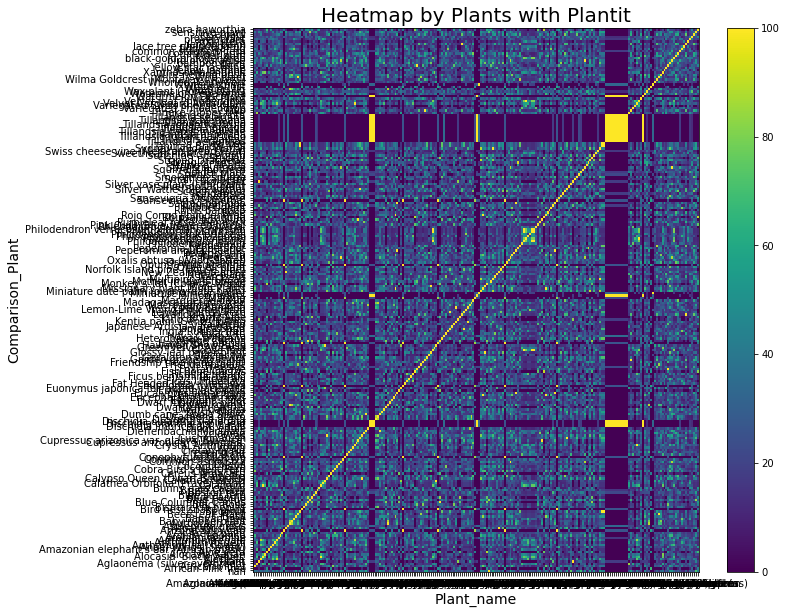

In [43]:
#heatmap by plt.pcolor()
plt.rcParams['figure.figsize'] = [10, 10]
plt.pcolor(df_plant)
plt.xticks(np.arange(0.5, len(df_plant.columns), 1), df_plant.columns)
plt.yticks(np.arange(0.5, len(df_plant.index), 1), df_plant.index)
plt.title('Heatmap by Plants with Plantit', fontsize=20)
plt.xlabel('Plant_name', fontsize=14)
plt.ylabel('Comparison_Plant', fontsize=14)
plt.colorbar()
plt.show()

In [44]:
hm_final = pd.read_excel('/gdrive/My Drive/Colab Notebooks/DataHandling/Drive_Final_heatmap_plant_MBTI.xlsx')
df_final = hm_final.pivot('Plant', 'MBTI', 'Weight')
df_final.head()

MBTI,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
Plant,,,,,,,,,,,,,,,,
Amazonian elephant's ear (African mask),0.314485,0.314485,0.169031,0.377964,0.104828,0.097590,0.000000,0.113961,0.428571,0.390360,0.338062,0.000000,0.113961,0.000000,0.091670,0.000000
Basil,0.124035,0.372104,0.600000,0.149071,0.248069,0.230940,0.269680,0.269680,0.169031,0.230940,0.400000,0.258199,0.539360,0.134840,0.325396,0.124035
Blue candle,0.230769,0.153846,0.248069,0.277350,0.384615,0.358057,0.668994,0.334497,0.104828,0.214834,0.124035,0.160128,0.334497,0.334497,0.672673,0.615385
Bunny ears cactus,0.167248,0.334497,0.674200,0.201008,0.250873,0.155700,0.454545,0.363636,0.227921,0.155700,0.404520,0.174078,0.272727,0.090909,0.365636,0.334497
Cretan brake,0.372104,0.372104,0.200000,0.447214,0.124035,0.115470,0.000000,0.134840,0.507093,0.461880,0.400000,0.000000,0.134840,0.000000,0.108465,0.000000


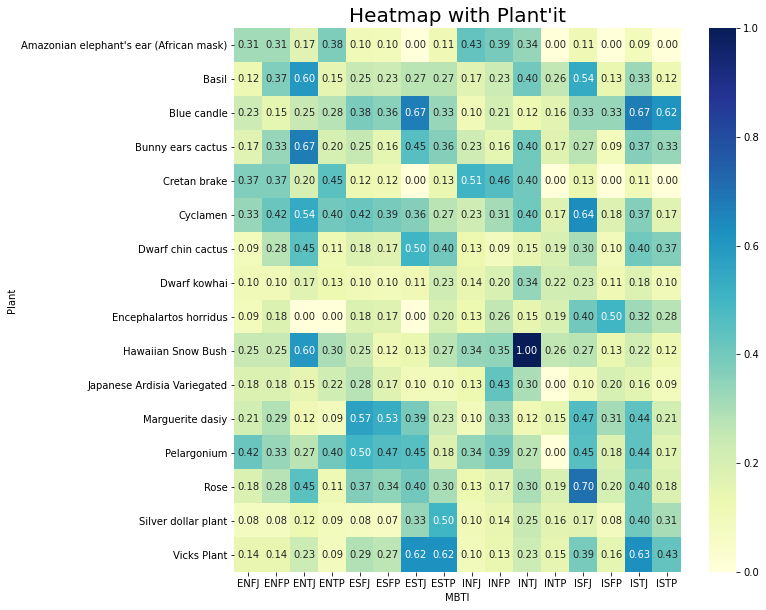

In [47]:
# different colormap
sns.heatmap(df_final, cmap='YlGnBu',annot=True, fmt='0.2f') 
plt.title('Heatmap with Plant\'it', fontsize=20)
plt.show()